In [1]:
import pandas as pd
import ast
import json

df = pd.read_csv("../data/processed/movie_stats/movie_stats.csv", index_col=0)

df["cast"] = df["cast"].map(ast.literal_eval)
df["release_date"] = pd.to_datetime(df["release_date"], format="%Y-%m-%d")
df["release_year"] = df["release_date"].dt.year
df["release_month"] = df["release_date"].dt.month
df["release_day"] = df["release_date"].dt.day

df.head()

,movie_name,imdb_id,release_date,cast,direction,production_companies,movie_budget,movie_revenue,release_year,release_month,release_day
0,The Marvels,tt10676048,2023-11-08,{'Brie Larson': 'Carol Danvers / Captain Marve...,['Nia DaCosta'],"['Marvel Studios', 'Kevin Feige Productions']",274800000,108998133,2023,11,8
1,Guardians of the Galaxy Vol. 3,tt6791350,2023-05-03,"{'Chris Pratt': 'Peter Quill / Star-Lord', 'Zo...",['James Gunn'],"['Marvel Studios', 'Kevin Feige Productions']",250000000,845430302,2023,5,3
2,Spider-Man: No Way Home,tt10872600,2021-12-15,"{'Tom Holland': 'Peter Parker / Spider-Man', '...",['Jon Watts'],"['Marvel Studios', 'Pascal Pictures', 'Columbi...",200000000,1921847111,2021,12,15
3,Avengers: Infinity War,tt4154756,2018-04-25,"{'Robert Downey Jr.': 'Tony Stark / Iron Man',...","['Anthony Russo', 'Joe Russo']",['Marvel Studios'],300000000,2052415039,2018,4,25
4,Ant-Man and the Wasp: Quantumania,tt10954600,2023-02-15,"{'Paul Rudd': 'Scott Lang / Ant-Man', 'Evangel...",['Peyton Reed'],"['Marvel Studios', 'Kevin Feige Productions']",200000000,476071180,2023,2,15


In [2]:
df.describe()

,release_date,movie_budget,movie_revenue,release_year,release_month,release_day
count,33,3.300000e+01,3.300000e+01,33.000000,33.000000,33.000000
mean,2017-05-08 19:38:10.909090816,2.022061e+08,8.983435e+08,2016.878788,6.212121,15.787879
min,2008-04-30 00:00:00,1.300000e+08,1.089981e+08,2008.000000,2.000000,1.000000
25%,2014-03-20 00:00:00,1.600000e+08,5.193120e+08,2014.000000,4.000000,6.000000
50%,2017-10-02 00:00:00,2.000000e+08,7.727766e+08,2017.000000,6.000000,15.000000
75%,2021-09-01 00:00:00,2.200000e+08,1.131928e+09,2021.000000,7.000000,25.000000
max,2023-11-08 00:00:00,3.650000e+08,2.800000e+09,2023.000000,12.000000,30.000000
std,NaN,5.826246e+07,5.661510e+08,4.435352,2.880512,9.717116


In [3]:
movie_counts = df["release_year"].value_counts()
df_year = df.groupby("release_year")[["movie_budget", "movie_revenue"]].sum()
df_year

,movie_budget,movie_revenue
release_year,,
2008,290000000,748886296
2010,200000000,623933331
2011,290000000,819896392
2012,220000000,1518815515
2013,370000000,1860360345
2014,340000000,1487543172
2015,495000000,1924715659
2016,430000000,1831389590
2017,555000000,2599224781


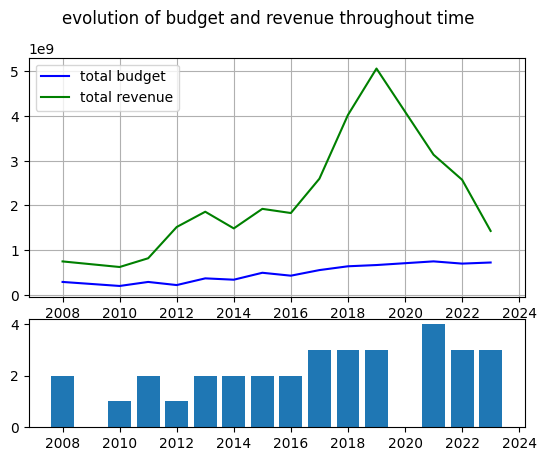

In [4]:
import matplotlib.pyplot as plt

# fig, axs = plt.subplots(1,2)
# remove the underlying axes
# for ax in axs[:2]:
#     ax.remove()
# axbig = fig.add_subplot(gs[1:, :2])


fig = plt.figure()

gs = fig.add_gridspec(3, 1)
ax1 = fig.add_subplot(gs[:2])
ax1.grid()
ax2 = fig.add_subplot(gs[2], sharex=ax1)


ax1.plot(df_year.index, df_year["movie_budget"], color="blue", label="total budget")
# frame1.axes.get_xaxis().set_visible(False)
ax1.plot(df_year.index, df_year["movie_revenue"], color="green", label="total revenue")
ax1.legend()
ax2.bar(movie_counts.index, movie_counts)
fig.suptitle("evolution of budget and revenue throughout time")

plt.show()

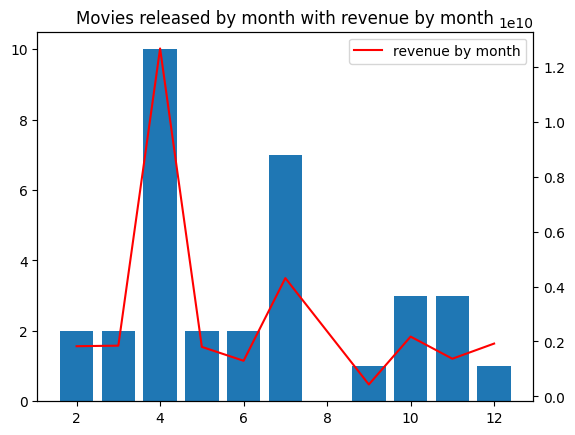

In [5]:
month_counts = df["release_month"].value_counts()
df_year = df.groupby("release_year")[["movie_budget", "movie_revenue"]].sum()
df_month = df.groupby("release_month")[["movie_budget", "movie_revenue"]].sum()

plt.bar(month_counts.index, month_counts)
axes2 = plt.twinx()
axes2.plot(df_month["movie_revenue"], color="red", label="revenue by month")

plt.title("Movies released by month with revenue by month")
plt.legend()
plt.show()

In [6]:
user_review_df = pd.read_csv("../data/raw/reviews/RT_audience.csv")

user_review_df["date"] = pd.to_datetime(user_review_df["date"], format="%Y-%m-%d")

user_review_df

,movie,user,score,date,text,url,scrape date
0,ant-man-and-the-wasp-quantumania,Jim R,1.0,2023-10-21,No science was involved in this.So much potent...,https://www.rottentomatoes.com/m/ant_man_and_t...,2023-10-20
1,ant-man-and-the-wasp-quantumania,Stephan B,3.0,2023-10-20,"OMG, how terrible was that... And why oh why h...",https://www.rottentomatoes.com/m/ant_man_and_t...,2023-10-20
2,ant-man-and-the-wasp-quantumania,Ethan A,10.0,2023-10-20,This movie deserves way more credit than its g...,https://www.rottentomatoes.com/m/ant_man_and_t...,2023-10-20
3,ant-man-and-the-wasp-quantumania,Michael P,10.0,2023-10-18,I loved this movie. Kang was awesome and Rudd ...,https://www.rottentomatoes.com/m/ant_man_and_t...,2023-10-20
4,ant-man-and-the-wasp-quantumania,Robert M,1.0,2023-10-17,Sooooo we just stopped trying???? A plot that...,https://www.rottentomatoes.com/m/ant_man_and_t...,2023-10-20
...,...,...,...,...,...,...,...
278359,werewolf-by-night,Nyein Chan H,10.0,2022-10-07,This is the best of MCU phase 4,https://www.rottentomatoes.com/m/werewolf_by_n...,2023-10-20
278360,werewolf-by-night,Harry L,10.0,2022-10-07,Werewolf By Nigth es Una Carta bien escrita y ...,https://www.rottentomatoes.com/m/werewolf_by_n...,2023-10-20
278361,werewolf-by-night,Matthew W,10.0,2022-10-06,Dark and Gruesome...something Marvel needed fo...,https://www.rottentomatoes.com/m/werewolf_by_n...,2023-10-20
278362,werewolf-by-night,NaN,10.0,2022-10-06,Thanks Kevin F. thanks Michael,https://www.rottentomatoes.com/m/werewolf_by_n...,2023-10-20


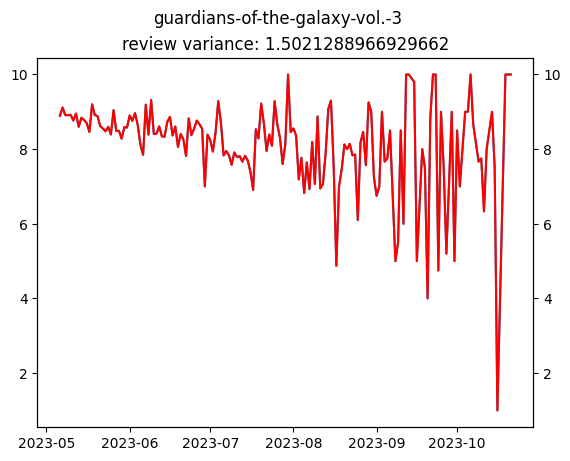

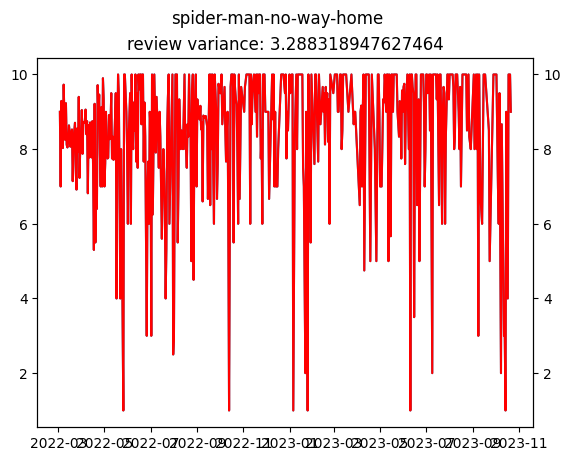

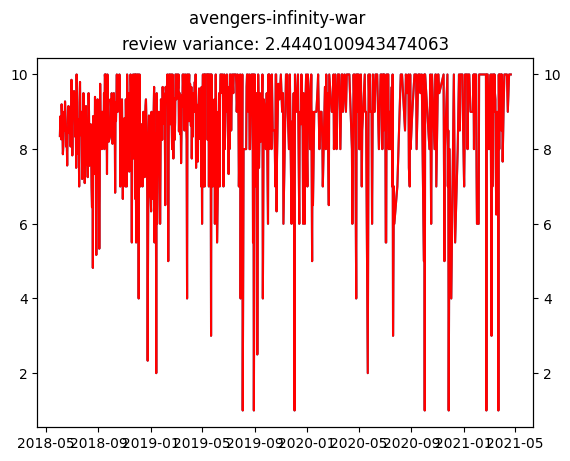

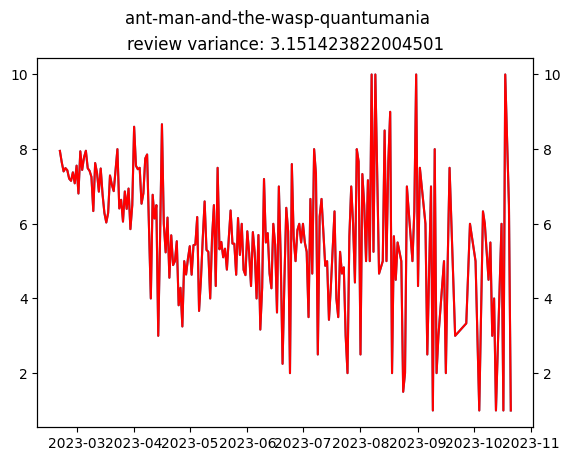

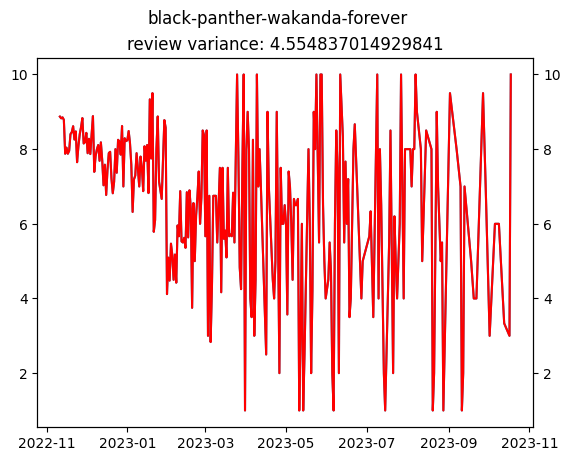

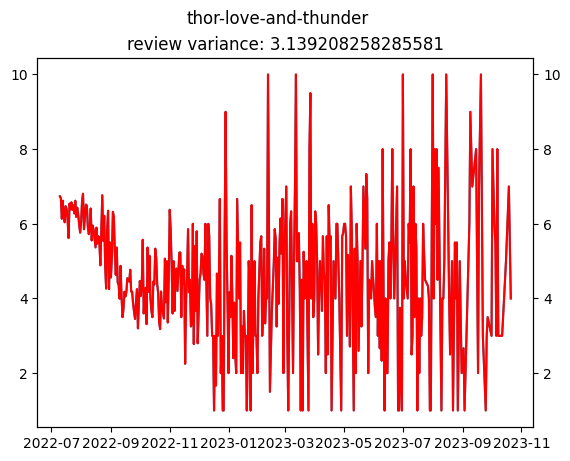

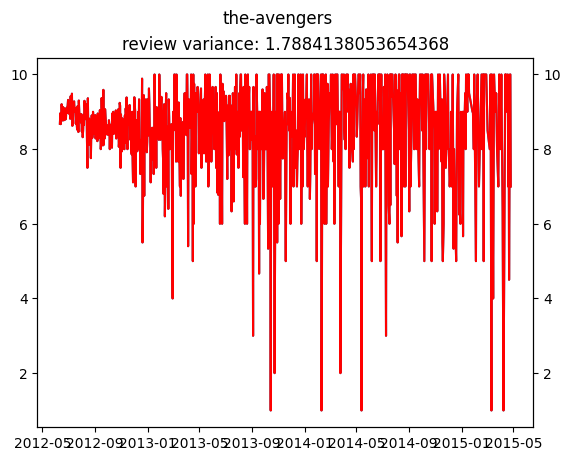

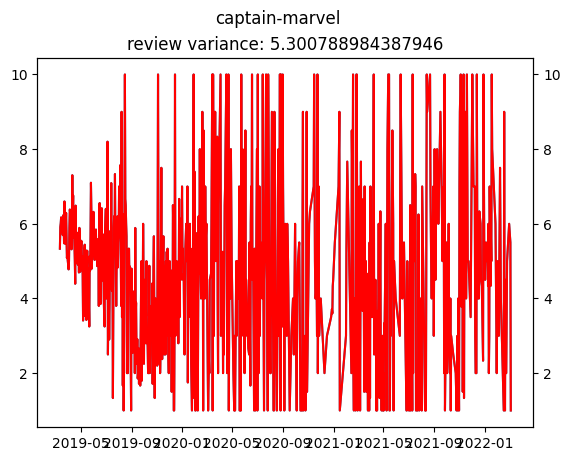

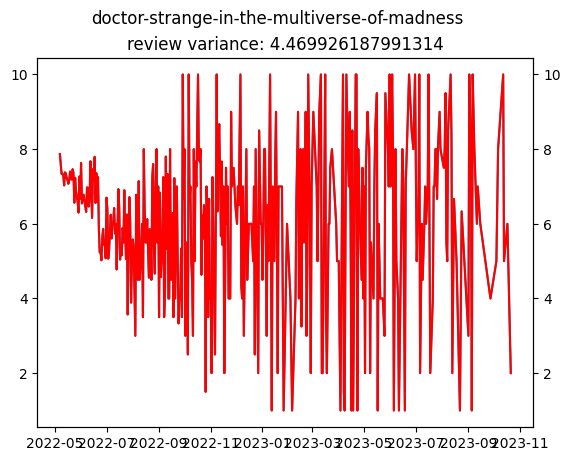

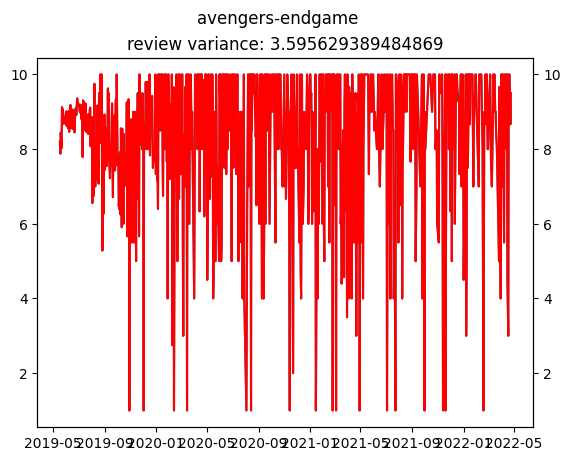

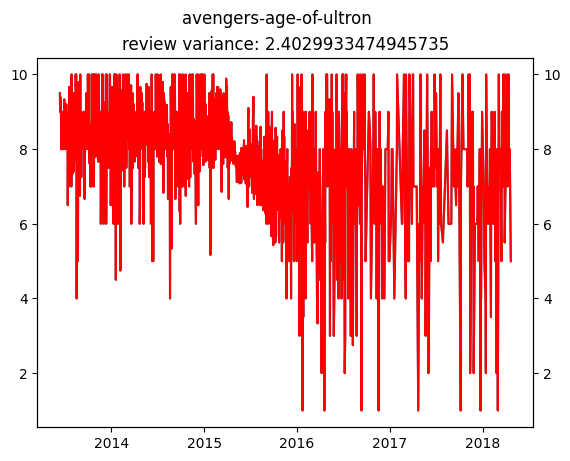

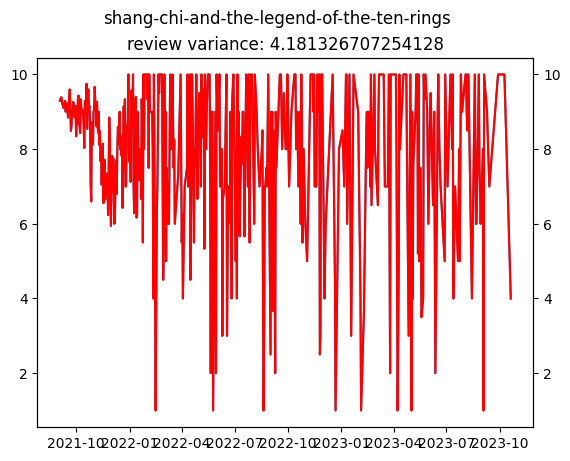

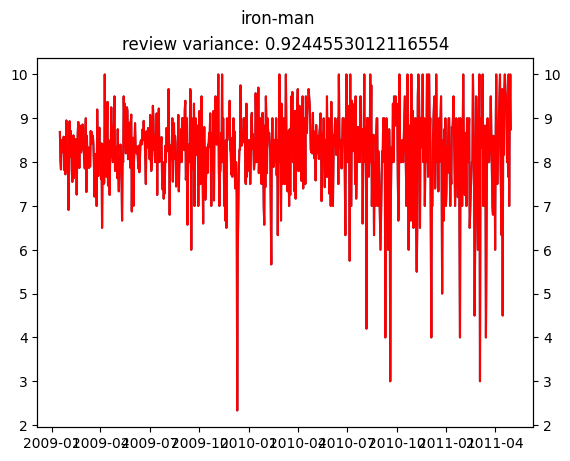

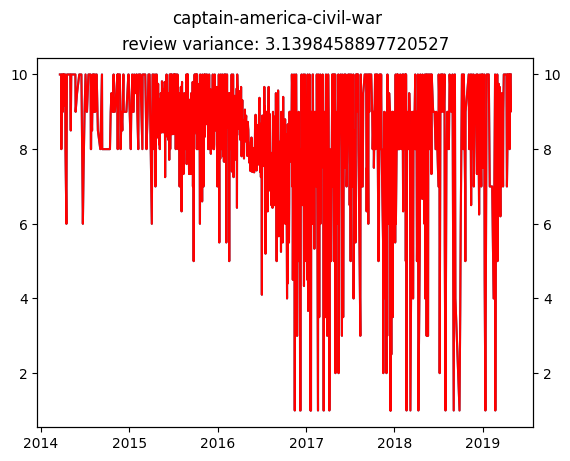

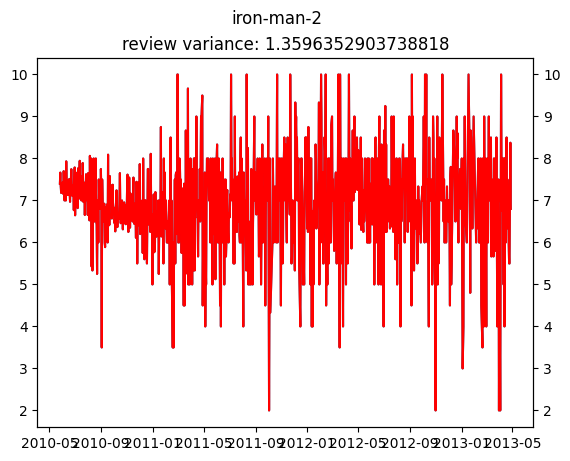

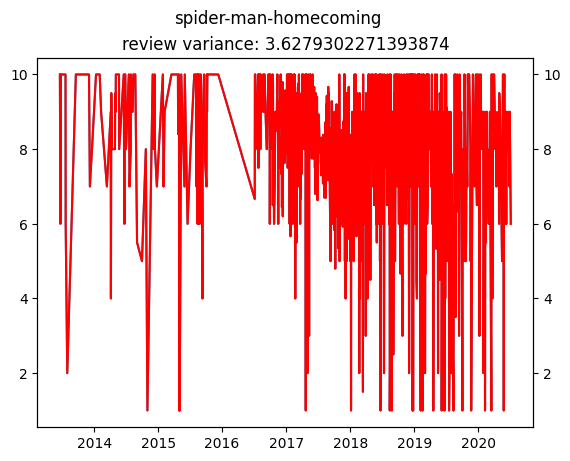

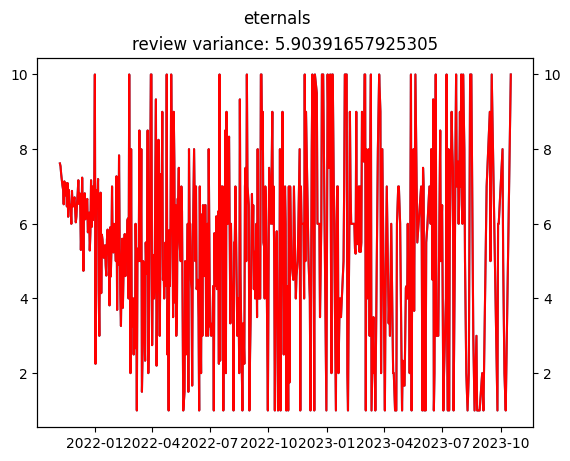

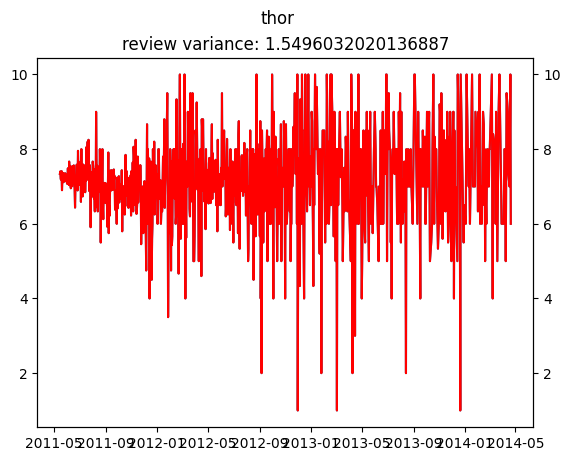

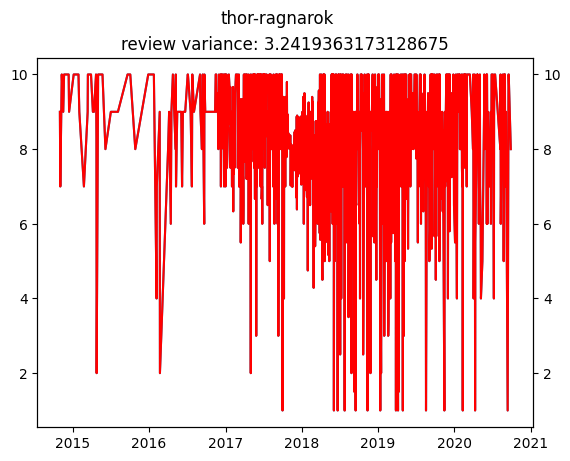

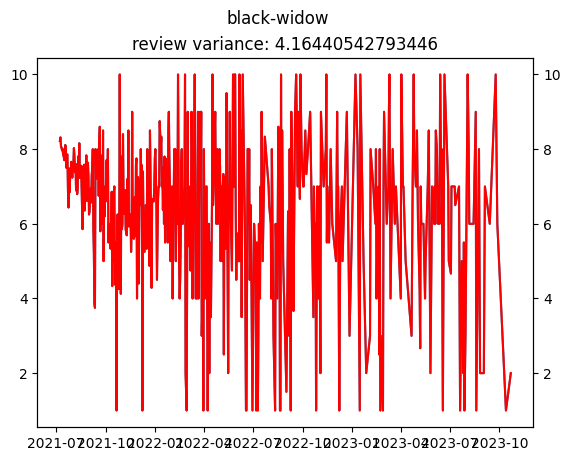

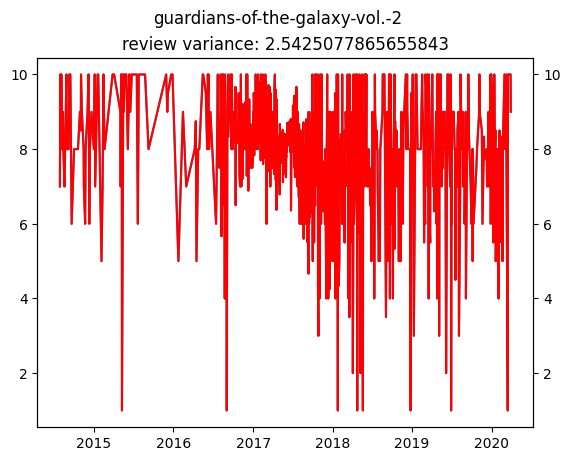

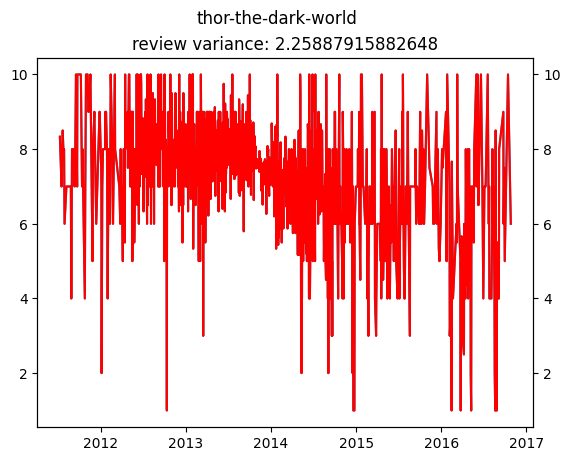

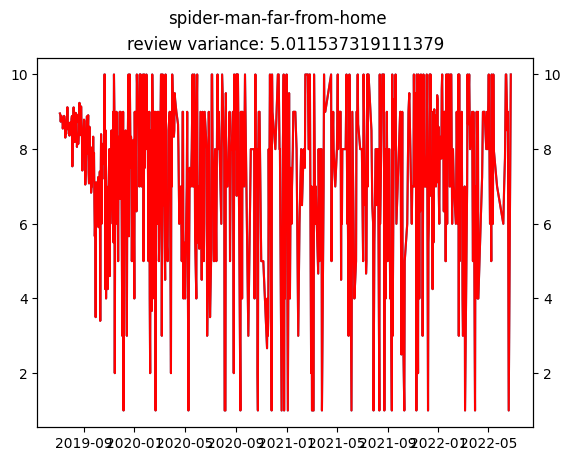

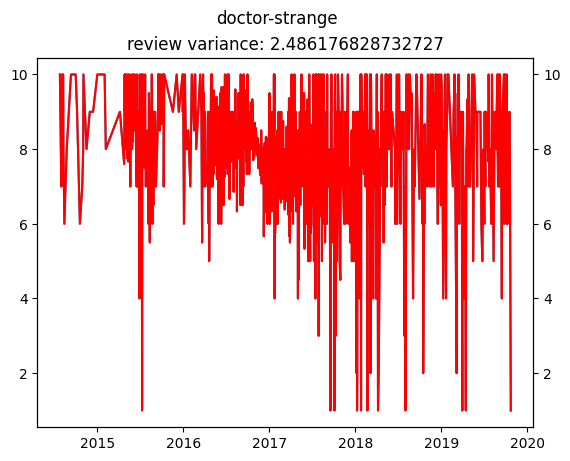

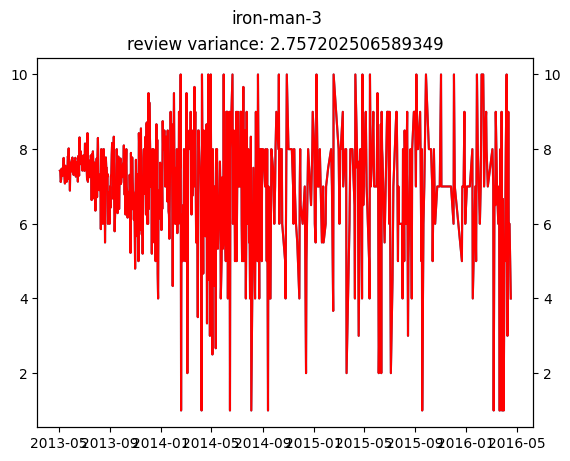

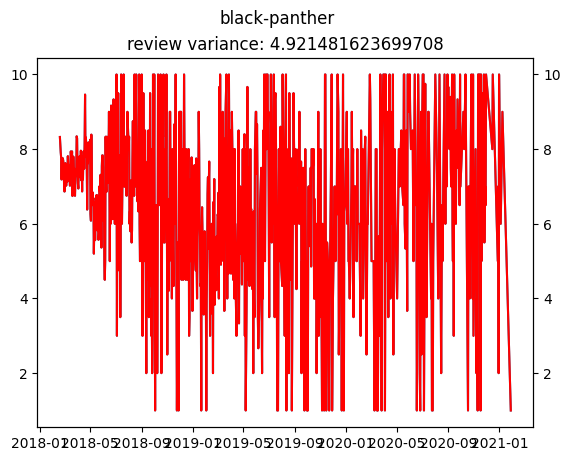

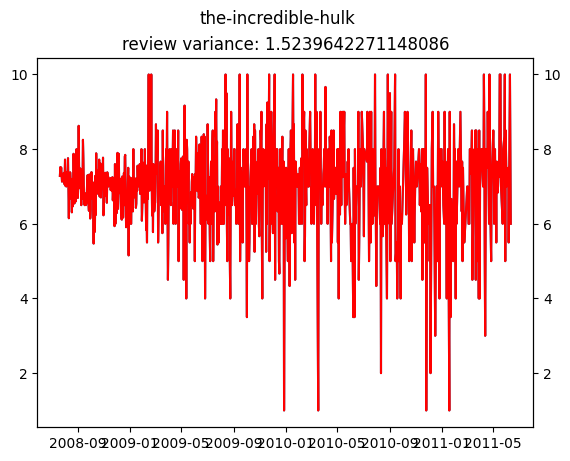

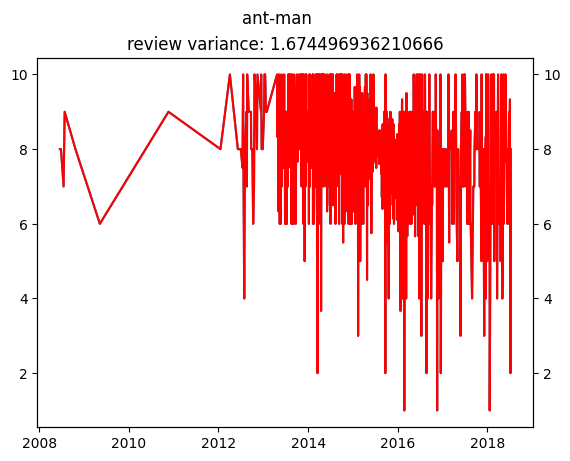

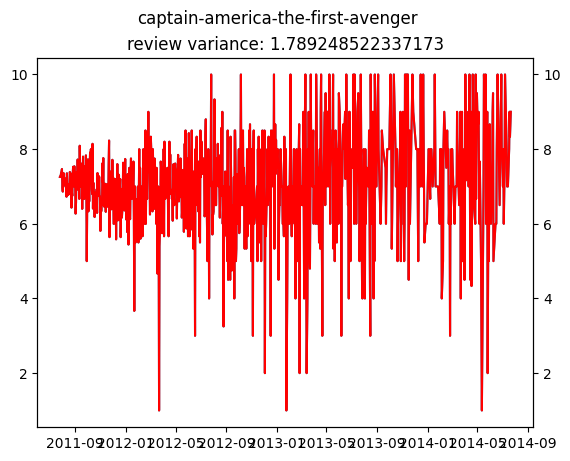

KeyError: 30

In [7]:
from datetime import timedelta
from scipy.interpolate import make_interp_spline, BSpline
import numpy as np

with open("../data/raw/movie_stats/mcu_list.json", "r") as read_file:
    movie_names = json.load(read_file)
three_years = timedelta(days=365 * 3)

for idx, name in enumerate(movie_names):
    movie_df = user_review_df[user_review_df["movie"] == name]
    movie_df = movie_df[movie_df["date"] <= df.loc[idx]["release_date"] + three_years]
    movie_df = movie_df.groupby("date")["score"].mean()
    movie_var = movie_df.var()
    if movie_df.empty:
        continue
    plt.plot(movie_df)
    axes2 = plt.twinx()
    axes2.plot(movie_df.interpolate(), color="red")
    plt.suptitle(f"{name}")
    plt.title(f"review variance: {movie_var}")
    plt.show()